In [21]:
import pandas as pd
import matplotlib.pyplot as plt


In [39]:
df = pd.read_csv('/zomato_bang.csv', encoding='utf-8')

ParserError: ignored

In [27]:
column_names = df.columns
print(column_names)

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


In [29]:
#1 Identify the most popular restaurants in the city.
# Sort the restaurants by the number of votes in descending order
popular_restaurants = df.sort_values(by='votes', ascending=False)

In [14]:
# Get the top 10 popular restaurants
top_10_restaurants = popular_restaurants.head(10)

In [15]:
# Print the top 10 popular restaurants
print(top_10_restaurants[['name', 'votes']])

                             name    votes
3921  Byg Brewski Brewing Company  16345.0
4944  Byg Brewski Brewing Company  16345.0
4801  Byg Brewski Brewing Company  16345.0
5945        Arbor Brewing Company   8375.0
6590        Arbor Brewing Company   8375.0
5257         Church Street Social   7544.0
6058         Church Street Social   7544.0
4131                         Hoot   7193.0
4945                         Hoot   7193.0
4802                         Hoot   7193.0


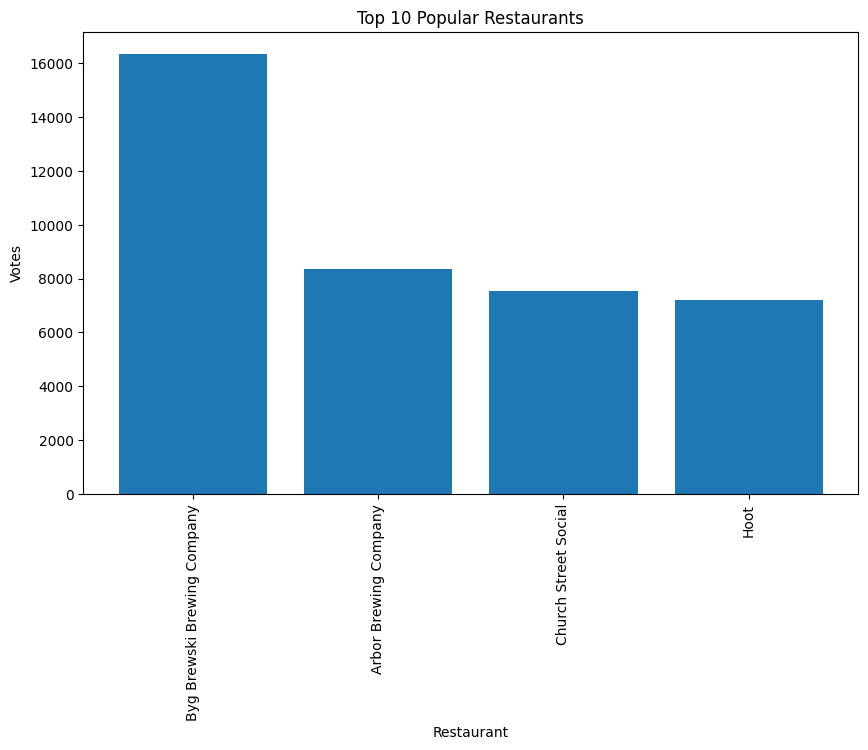

In [40]:
# Visualize the top 10 popular restaurants
plt.figure(figsize=(10, 6))
plt.bar(top_10_restaurants['name'], top_10_restaurants['votes'])
plt.xlabel('Restaurant')
plt.ylabel('Votes')
plt.title('Top 10 Popular Restaurants')
plt.xticks(rotation=90)
plt.show()

In [17]:
# 2 Analyze the relationship between restaurant rating and price:

In [18]:
# Drop rows with missing values in 'rate' or 'approx_cost(for two people)' columns
df_cleaned = df.dropna(subset=['rate', 'approx_cost(for two people)'])

In [49]:
# Convert the 'rate' column to numeric
df_cleaned['rate'] = pd.to_numeric(df_cleaned['rate'], errors='coerce')

<ipython-input-49-8d2b98499852>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rate'] = pd.to_numeric(df_cleaned['rate'], errors='coerce')


In [50]:
# Filter out rows with NaN values in the 'rate' column
df_cleaned = df_cleaned[~df_cleaned['rate'].isna()]

In [53]:
# Print sample records from the cleaned dataset
print(df_cleaned.head())

Empty DataFrame
Columns: [url, address, name, online_order, book_table, rate, votes, phone, location, rest_type, dish_liked, cuisines, approx_cost(for two people), reviews_list, menu_item, listed_in(type), listed_in(city)]
Index: []


In [52]:
# Print summary information about the cleaned dataset
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          0 non-null      object 
 1   address                      0 non-null      object 
 2   name                         0 non-null      object 
 3   online_order                 0 non-null      object 
 4   book_table                   0 non-null      object 
 5   rate                         0 non-null      float64
 6   votes                        0 non-null      float64
 7   phone                        0 non-null      object 
 8   location                     0 non-null      object 
 9   rest_type                    0 non-null      object 
 10  dish_liked                   0 non-null      object 
 11  cuisines                     0 non-null      object 
 12  approx_cost(for two people)  0 non-null      object 
 13  reviews_list                 0 n

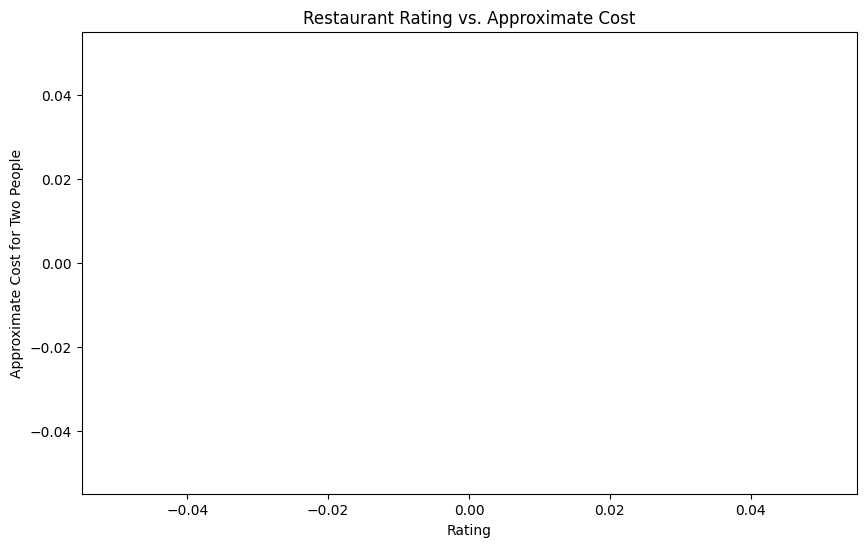

In [51]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['rate'], df_cleaned['approx_cost(for two people)'])
plt.xlabel('Rating')
plt.ylabel('Approximate Cost for Two People')
plt.title('Restaurant Rating vs. Approximate Cost')
plt.show()

In [58]:
# Drop unnecessary columns
df_cleaned = df.drop(['url', 'address', 'phone'], axis=1)

In [61]:
print(df['approx_cost(for two people)'].unique())

['800' '300' '600' '700' '550' '500' '450' '650' '400' '900' '200' '750'
 '150' '850' '100' '1,200' '350' '250' '950' '1,000' '1,500' '1,300' '199'
 '80' '1,100' '160' '1,600' '230' '130' '50' '190' '1,700' nan '1,400'
 '180' '1,350' '2,200' '2,000' '1,800' '1,900' '330' '2,500' '2,100'
 '3,000' '2,800' '3,400' '40' '1,250' '3,500' '4,000' '2,400' '2,600']


In [62]:
df_cleaned['approx_cost(for two people)'] = df_cleaned['approx_cost(for two people)'].str.replace(',', '').astype(float)

In [64]:
# Convert the 'approx_cost(for two people)' column to numeric
df_cleaned['approx_cost(for two people)'] = pd.to_numeric(df_cleaned['approx_cost(for two people)'], errors='coerce')

In [65]:
# Print the updated data types of the columns
print(df_cleaned.dtypes)

name                            object
online_order                    object
book_table                      object
rate                            object
votes                          float64
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object


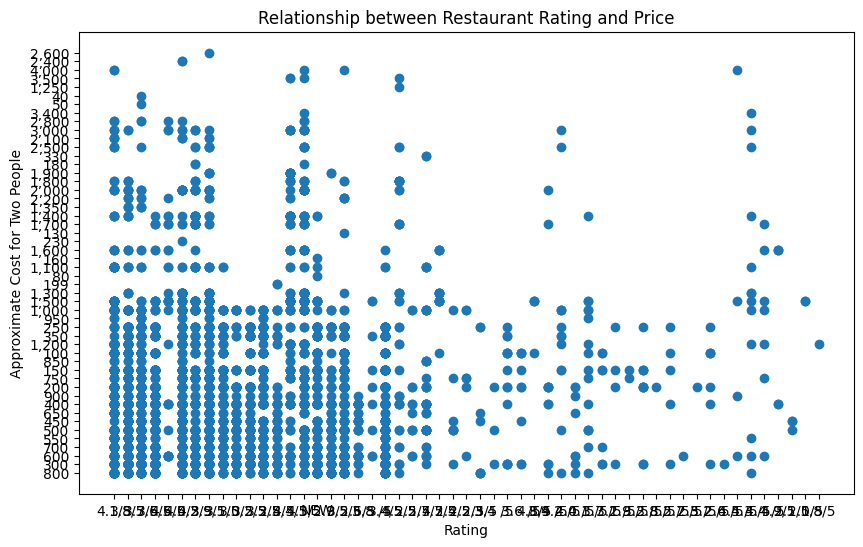

In [67]:
# Plotting the relationship between rating and price
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['rate'], df_cleaned['approx_cost(for two people)'])
plt.xlabel('Rating')
plt.ylabel('Approximate Cost for Two People')
plt.title('Relationship between Restaurant Rating and Price')
plt.show()

In [ ]:
#3rd

In [69]:
from collections import Counter

In [71]:
# Create a list of cuisines
cuisines_list = df['cuisines'].dropna().str.split(', ').sum()

In [72]:
# Count the occurrences of each cuisine
cuisine_counts = pd.Series(cuisines_list).value_counts()

In [73]:
# Plot the top 10 popular cuisines
top_10_cuisines = cuisine_counts.head(10)

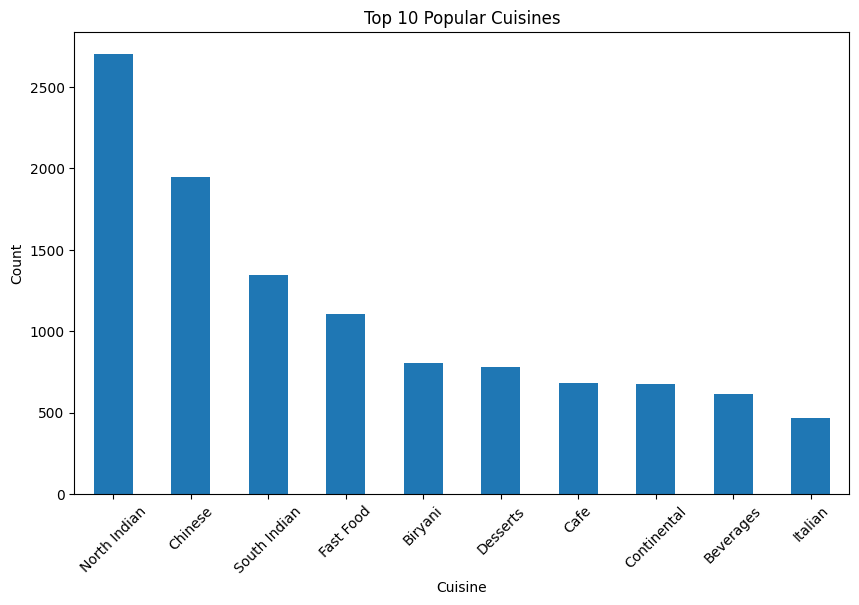

In [74]:
plt.figure(figsize=(10, 6))
top_10_cuisines.plot(kind='bar')
plt.title('Top 10 Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [75]:
#4th

In [76]:
# Find the restaurant with the highest number of votes
restaurant_highest_votes = df.loc[df['votes'].idxmax(), 'name']
print("Restaurant with the highest number of votes:", restaurant_highest_votes)

Restaurant with the highest number of votes: Byg Brewski Brewing Company


In [77]:
#5th

In [78]:
# Clean the 'rate' column
df['rate'] = df['rate'].replace('NEW', '0')  # Replace 'NEW' with '0'
df['rate'] = df['rate'].replace('-', '0')    # Replace '-' with '0'
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0].strip()) if isinstance(x, str) else x)

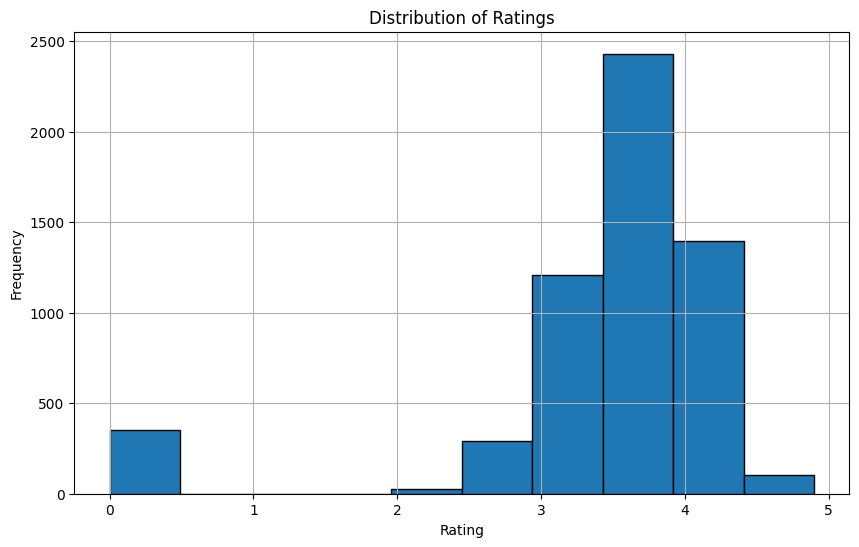

In [79]:
# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
df['rate'].hist(bins=10, edgecolor='k')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [80]:
#6th

In [81]:
# Count the occurrences of each restaurant type
restaurant_type_counts = df['rest_type'].value_counts()

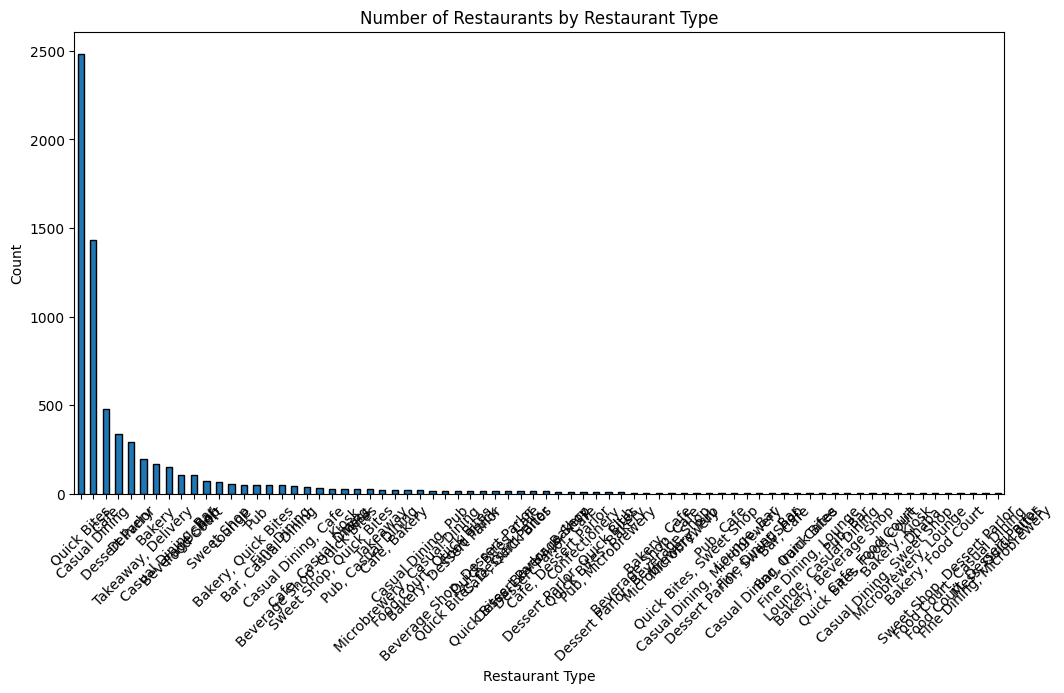

In [82]:
# Plot the counts of each restaurant type
plt.figure(figsize=(12, 6))
restaurant_type_counts.plot(kind='bar', edgecolor='k')
plt.title('Number of Restaurants by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [83]:
#7th

In [84]:
# Count the occurrences of online orders
online_order_counts = df['online_order'].value_counts()

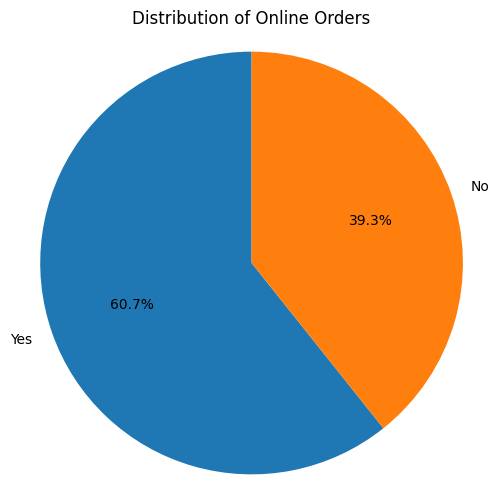

In [85]:
# Plot the distribution of online orders
plt.figure(figsize=(6, 6))
plt.pie(online_order_counts, labels=online_order_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Online Orders')
plt.axis('equal')
plt.show()

In [ ]:
#7th

In [86]:
# Extract menu items from each restaurant
menu_items = df['menu_item'].str.split(', ').dropna()

In [87]:
# Flatten the menu items into a single list
menu_items = [item for sublist in menu_items for item in sublist]

In [88]:
# Count the occurrences of each menu item
menu_item_counts = Counter(menu_items)

In [89]:
# Get the top 10 most popular menu items
top_menu_items = menu_item_counts.most_common(10)

In [90]:
# Print the top 10 popular menu items
print("Top 10 Popular Menu Items:")
for item, count in top_menu_items:
    print(f"{item}: {count} restaurants")

Top 10 Popular Menu Items:
[]: 5609 restaurants
'Veg Fried Rice': 333 restaurants
'Jeera Rice': 311 restaurants
'Paneer Butter Masala': 310 restaurants
'Chicken Fried Rice': 306 restaurants
'Gobi Manchurian': 269 restaurants
'Butter Naan': 257 restaurants
'Ghee Rice': 247 restaurants
'Chicken Biryani': 236 restaurants
'Veg Biryani': 233 restaurants
